In [186]:
import pandas as pd

In [187]:
import numpy as np

In [188]:
import seaborn as sns

In [189]:
import matplotlib.pyplot as plt

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

In [193]:
from imblearn.over_sampling import SMOTE

In [194]:
credit_data = pd.read_csv('credit_record.csv')

In [195]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [196]:
credit_data.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [197]:
credit_data.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C
1048574,5150487,-29,C


In [198]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [199]:
credit_data.isnull().sum

<bound method DataFrame.sum of             ID  MONTHS_BALANCE  STATUS
0        False           False   False
1        False           False   False
2        False           False   False
3        False           False   False
4        False           False   False
...        ...             ...     ...
1048570  False           False   False
1048571  False           False   False
1048572  False           False   False
1048573  False           False   False
1048574  False           False   False

[1048575 rows x 3 columns]>

In [200]:
application_data = pd.read_csv('application_record.csv')

In [201]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [202]:
application_data.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [203]:

application_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [204]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [205]:
application_data.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [206]:
application_data.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [207]:
# Data Preprocessing
# Merge datasets on ID
merged_data = pd.merge(application_data, credit_data, on='ID')

In [208]:

merged_data['CODE_GENDER'] = merged_data['CODE_GENDER'].map({'M': 1, 'F': 0})
merged_data['FLAG_OWN_CAR'] = merged_data['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
merged_data['FLAG_OWN_REALTY'] = merged_data['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

In [209]:
numeric_cols = merged_data.select_dtypes(include='number')
merged_data.fillna(numeric_cols.median(), inplace=True)


In [210]:
print(merged_data.dtypes)


ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE           int64
STATUS                  object
dtype: object


In [211]:
# Feature engineering
merged_data['AGE'] = merged_data['DAYS_BIRTH'] / -365
merged_data['EMPLOYMENT_YEARS'] = merged_data['DAYS_EMPLOYED'] / -365


In [212]:
# Convert STATUS into binary label
merged_data['FRAUD'] = merged_data['STATUS'].apply(lambda x: 1 if x in ['2', '3', '4', '5'] else 0)

In [213]:
# Drop unnecessary columns
columns_to_drop = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'STATUS', 'MONTHS_BALANCE']
merged_data.drop(columns=columns_to_drop, inplace=True)


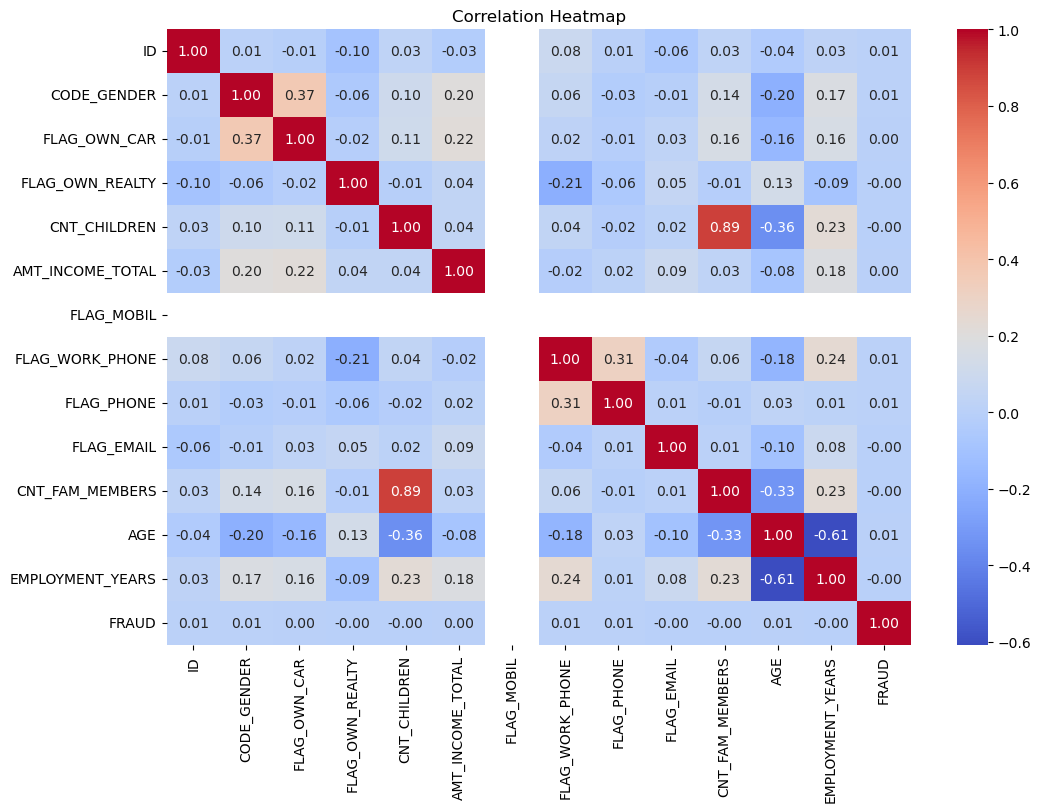

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = merged_data.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


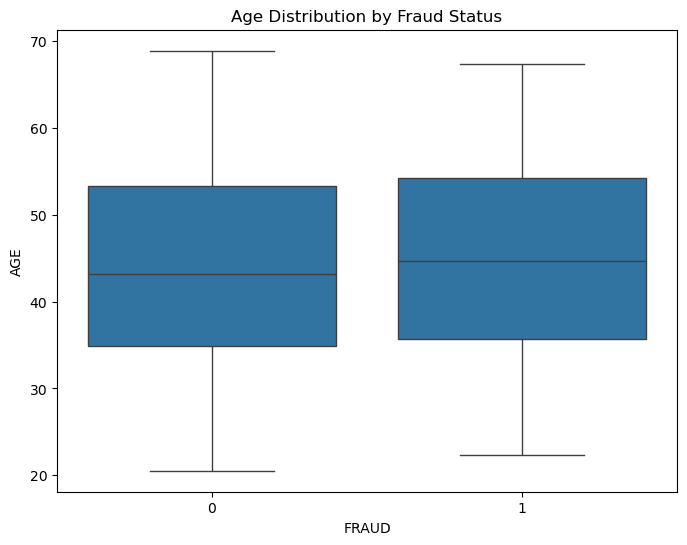

In [215]:
# Boxplot for AGE vs FRAUD
plt.figure(figsize=(8, 6))
sns.boxplot(x='FRAUD', y='AGE', data=merged_data)
plt.title('Age Distribution by Fraud Status')
plt.show()

In [216]:
# Data Preparation for Model
X = merged_data.drop(['FRAUD', 'ID'], axis=1)
y = merged_data['FRAUD']


In [217]:
print(X.dtypes)


CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE                    float64
EMPLOYMENT_YEARS       float64
dtype: object


In [218]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [219]:
X = pd.get_dummies(X, drop_first=True)


In [220]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [221]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [222]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [223]:
# Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [224]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.00      0.01    232084
           1       0.50      1.00      0.67    232849

    accuracy                           0.50    464933
   macro avg       0.70      0.50      0.34    464933
weighted avg       0.70      0.50      0.34    464933



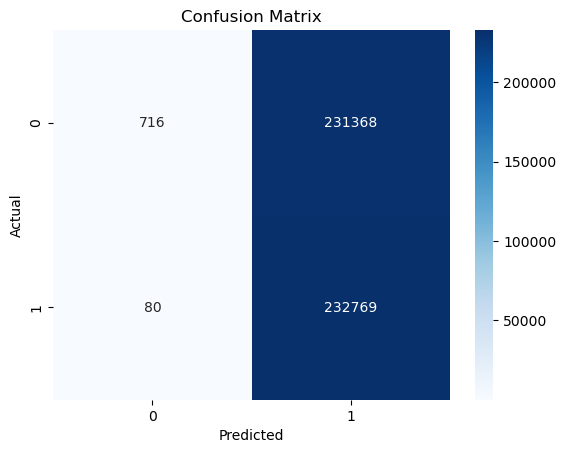

In [225]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_10308\232572021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FRAUD', data=merged_data, palette='viridis')


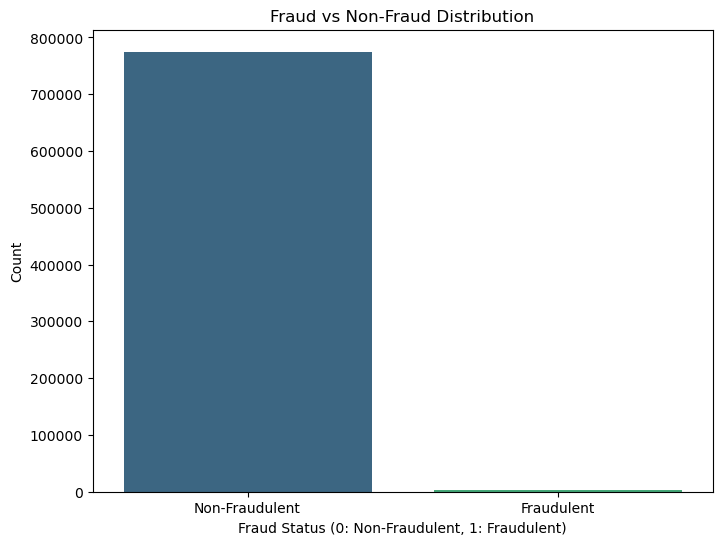

In [226]:
# Bar Chart for Fraud vs Non-Fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='FRAUD', data=merged_data, palette='viridis')
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Fraud Status (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


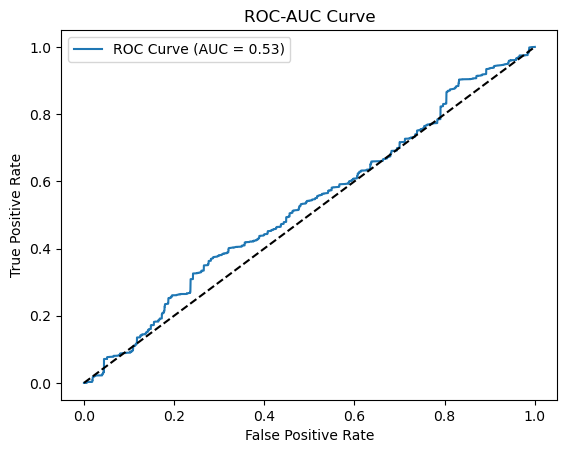

In [227]:
# ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


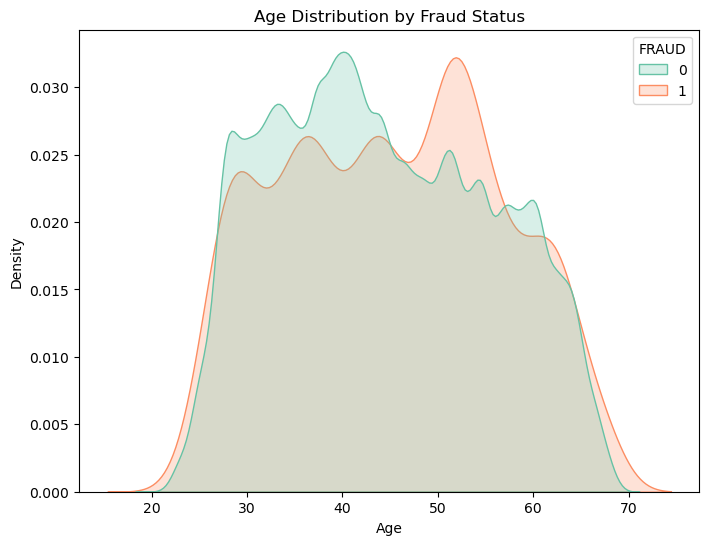

In [228]:
# Distribution Plot for Age by Fraud Status
plt.figure(figsize=(8, 6))
sns.kdeplot(data=merged_data, x='AGE', hue='FRAUD', fill=True, common_norm=False, palette='Set2')
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

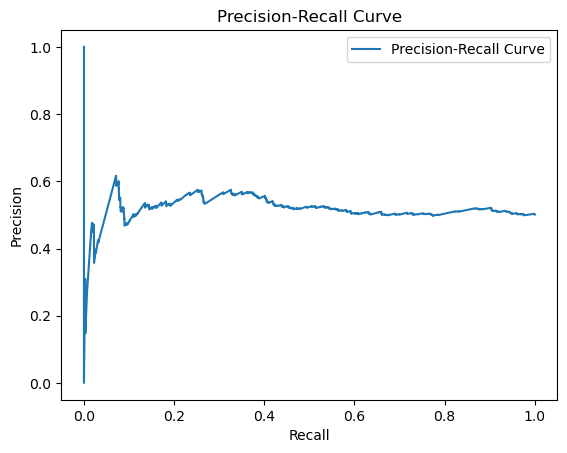

In [229]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [236]:
X['OCCUPATION_TYPE'].unique()

array([18, 16, 14,  0,  8, 10,  4,  3,  6,  1, 12,  2,  9, 11, 15, 17,  5,
       13,  7])

In [237]:
# Deployment Simulation (Simple User Interface Simulation)
def predict_fraud(transaction_data):
    df = pd.DataFrame([transaction_data])
    df = df[X.columns]  # Ensure it matches training feature set
    prediction = model.predict(df)
    probability = model.predict_proba(df)[:, 1]
    return {'Fraud Prediction': prediction[0], 'Fraud Probability': probability[0]}


In [238]:
# Example Transaction Prediction
sample_transaction = {
    'CODE_GENDER': 1,
    'FLAG_OWN_CAR': 1,
    'FLAG_OWN_REALTY': 0,
    'CNT_CHILDREN': 2,
    'AMT_INCOME_TOTAL': 50000,
    'NAME_INCOME_TYPE': 1,  # Encoded appropriately
    'NAME_EDUCATION_TYPE': 2,  # Encoded appropriately
    'NAME_FAMILY_STATUS': 1,  # Encoded appropriately
    'NAME_HOUSING_TYPE': 3,  # Encoded appropriately
    'AGE': 45,
    'EMPLOYMENT_YEARS': 10,
    'FLAG_MOBIL': 1,
    'FLAG_WORK_PHONE': 1,
    'FLAG_PHONE': 0,
    'FLAG_EMAIL': 1,
    'CNT_FAM_MEMBERS': 4,
    'OCCUPATION_TYPE': 1
}


In [239]:
print(predict_fraud(sample_transaction))

{'Fraud Prediction': 1, 'Fraud Probability': 0.5002280718609976}
